Bài toán XOR

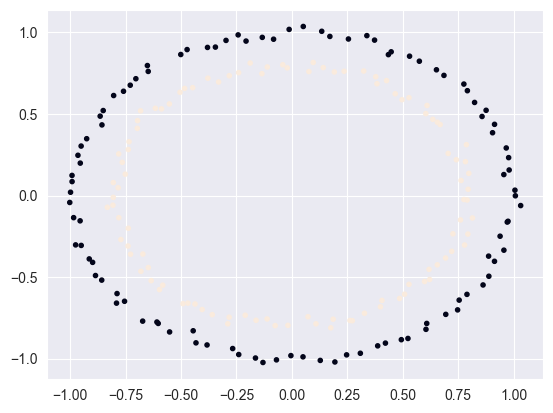

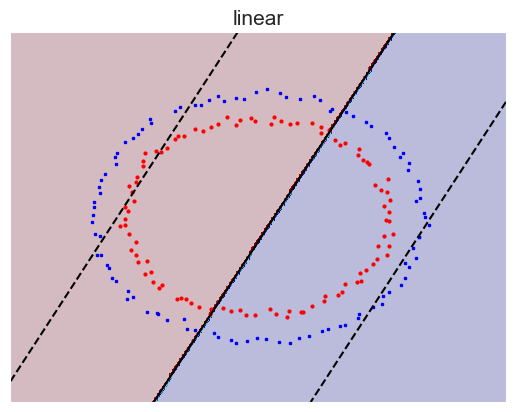

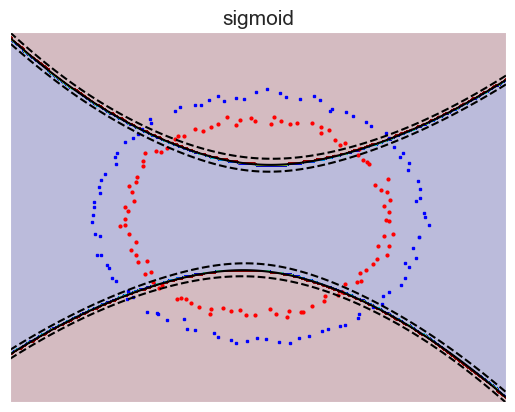

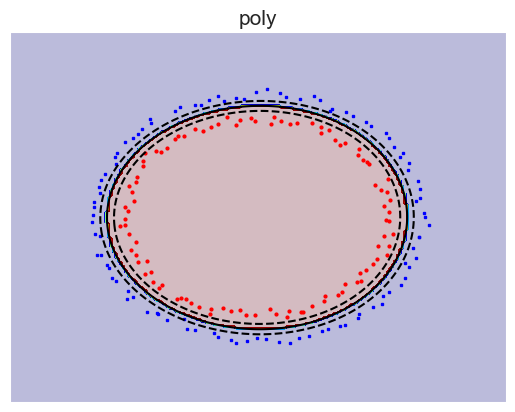

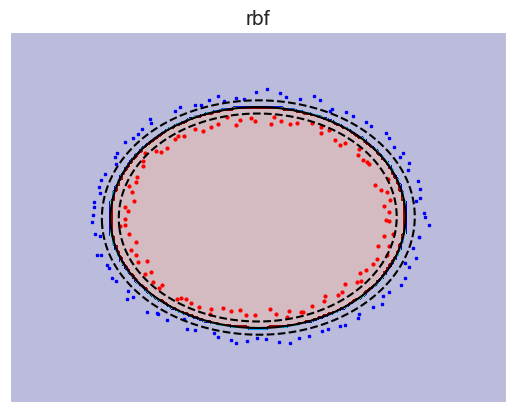

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.datasets import make_circles
# Generate dataset and targets
X, Y = make_circles(n_samples = 200, noise = 0.02)
# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()

fignum = 1
# fit the model
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)
    with PdfPages(kernel + '3.pdf') as pdf:
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(5, 5))
        plt.clf()
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
        facecolors='None')
        plt.plot(X[Y==0, 0], X[Y==0, 1], 'bs', markersize = 2)
        plt.plot(X[Y==1, 0], X[Y==1, 1], 'ro', markersize = 2)
        plt.axis('tight')
        x_min = -1.5
        x_max = 1.5
        y_min = -1.5
        y_max = 1.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(5, 5))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
        levels=[-.5, 0, .5])
        plt.title(kernel, fontsize = 15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
plt.show()

Bài tập 1: Sử dụng thư viện để đưa ra độ chính xác Accuracy và ma trận nhầm lẫn Confusion Matrix theo mỗi phương pháp (Tham khảo code từ các bài trước).

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
for kernels in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernels, gamma=1, coef0 = 1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy with ",kernels,":", accuracy_score(y_test, y_pred))
    print("Confusion matrix with ",kernels,":\n", confusion_matrix(y_test, y_pred))

Accuracy with  linear : 0.4
Confusion matrix with  linear :
 [[ 0 24]
 [ 0 16]]
Accuracy with  sigmoid : 0.575
Confusion matrix with  sigmoid :
 [[15  9]
 [ 8  8]]
Accuracy with  poly : 1.0
Confusion matrix with  poly :
 [[24  0]
 [ 0 16]]
Accuracy with  rbf : 1.0
Confusion matrix with  rbf :
 [[24  0]
 [ 0 16]]


Ví dụ 2. Trong ví dụ 2, chúng ta sử dụng dữ liệu kiểm tra chất lượng dự đoán liệu các vi mạch từ một nhà máy
chế tạo có đảm bảo chất lượng hay không. Tệp dữ liệu có trong file ex2data2.txt đính kèm. Dữ liệu quan sát gồm
2 chiều, đầu ra Y có dạng 0-1.

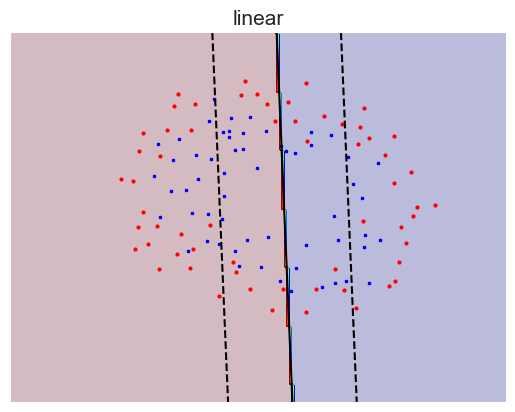

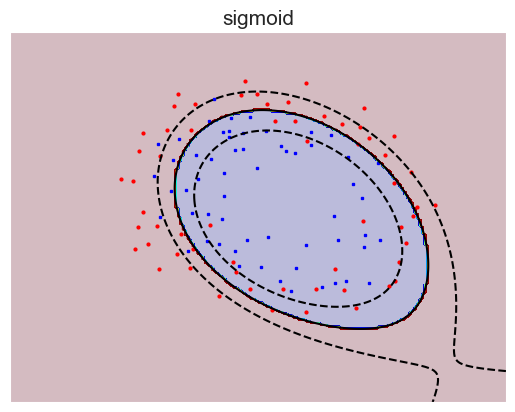

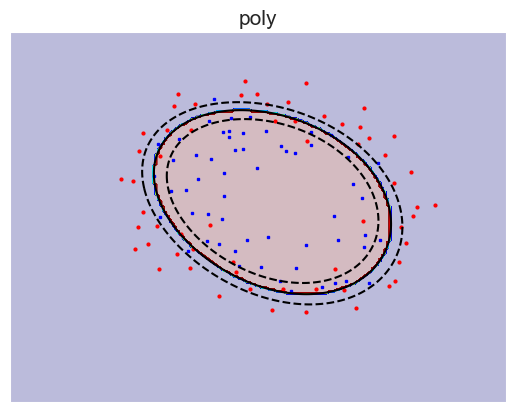

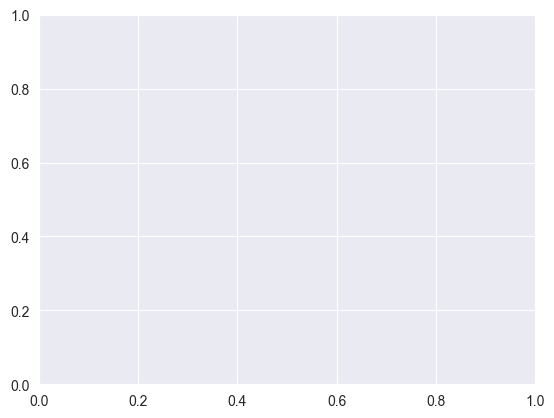

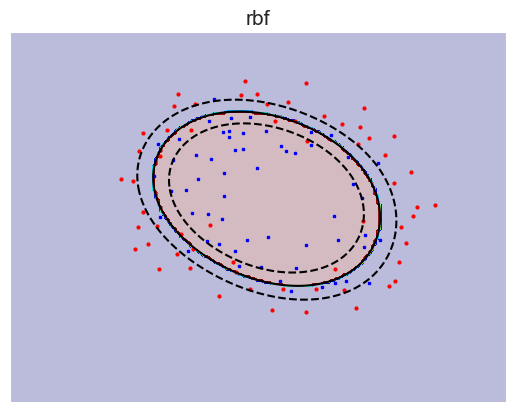

In [3]:
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

data = pd.read_csv('ex2data2.txt', header = None)
X = data.iloc[:, 0:2]
Y = data.iloc[:, 2]

# visualizing data
mask = Y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))


fignum = 1
# fit the model
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)
    with PdfPages(kernel + '3.pdf') as pdf:
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(5, 5))
        plt.clf()
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='None')
        plt.plot(X[mask][0].values, X[mask][1].values, 'bs', markersize = 2)
        plt.plot(X[~mask][0].values, X[~mask][1].values, 'ro', markersize = 2)
        plt.axis('tight')
        x_min = -1.5
        x_max = 1.5
        y_min = -1.5
        y_max = 1.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(5, 5))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
        plt.title(kernel, fontsize = 15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()

Bài tập tự thực hành 1. Cho tệp dữ liệu đính kèm ARgender.mat, đoạn lệnh sau đây sẽ đọc tệp dữ liệu đó và
chia làm hai phần dữ liệu Training và Test Data. Chú ý sửa lại đường dẫn đến file dữ liệu theo thiết lập của các
bạn:

In [4]:
import scipy.io as sio
from sklearn.svm import SVC

A = sio.loadmat('ARgender.mat')
X_train = A['Y_train'].T
X_test = A['Y_test'].T
print(X_train.shape)
N = 700
y_train = A['label_train'].reshape(N)
y_test = A['label_test'].reshape(N)

for kernels in ('linear','sigmoid', 'poly', 'rbf'):
    clf = SVC(kernel=kernels, gamma=1, coef0 = 1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy with ",kernels,":", accuracy_score(y_test, y_pred))
    print("Confusion matrix with ",kernels,":\n", confusion_matrix(y_test, y_pred))

(700, 300)
Accuracy with  linear : 0.9028571428571428
Confusion matrix with  linear :
 [[344   6]
 [ 62 288]]
Accuracy with  sigmoid : 0.8942857142857142
Confusion matrix with  sigmoid :
 [[342   8]
 [ 66 284]]
Accuracy with  poly : 0.9228571428571428
Confusion matrix with  poly :
 [[330  20]
 [ 34 316]]
Accuracy with  rbf : 0.9085714285714286
Confusion matrix with  rbf :
 [[341   9]
 [ 55 295]]


Bài tập tự thực hành 2. Cho tệp dữ liệu đính kèm dataset.csv, đoạn lệnh sau đây sẽ đọc tệp dữ liệu đó và chia
làm hai phần dữ liệu Training và Test Data. Chú ý sửa lại đường dẫn đến file dữ liệu theo thiết lập của các bạn:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Chuyển vị ma trận dữ liệu do ta đọc bằng Pandas => mỗi record là 1 dong
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

for kernels in ('linear','sigmoid', 'poly', 'rbf'):
    clf = SVC(kernel=kernels, gamma=1, coef0 = 1)
    clf.fit(XTrain, yTrain)
    y_pred = clf.predict(XTest)
    print("Accuracy with ",kernels,":", accuracy_score(yTest, y_pred))
    print("Confusion matrix with ",kernels,":\n", confusion_matrix(yTest, y_pred))

Accuracy with  linear : 0.9
Confusion matrix with  linear :
 [[66  2]
 [ 8 24]]
Accuracy with  sigmoid : 0.7
Confusion matrix with  sigmoid :
 [[53 15]
 [15 17]]
Accuracy with  poly : 0.93
Confusion matrix with  poly :
 [[64  4]
 [ 3 29]]
Accuracy with  rbf : 0.93
Confusion matrix with  rbf :
 [[64  4]
 [ 3 29]]


Bài tập tự thực hành 3. Hãy thực hiện các yêu cầu như hai bài tập tự thực hành 1 và 2 với bài toán phân loại
tập dữ liệu ung thư vú. Dữ liệu này có sẵn trong sklearn.dataset, chúng ta có thể dùng đoạn lệnh sau để tải dữ
liệu từ thư viện này và hiện thị các trường của dữ liệu để dễ theo dõi:

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

# Breast cancer dataset for classification
data = load_breast_cancer()

X = data.data
Y = data.target

from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

for kernels in ('linear','sigmoid', 'poly', 'rbf'):
    clf = SVC(kernel=kernels, gamma=1, coef0 = 1)
    clf.fit(XTrain, yTrain)
    y_pred = clf.predict(XTest)
    print("Accuracy with",kernels,":", accuracy_score(yTest, y_pred))
    print("Confusion matrix with",kernels,":\n", confusion_matrix(yTest, y_pred))

Accuracy with linear : 0.972027972027972
Confusion matrix with linear :
 [[51  2]
 [ 2 88]]
Accuracy with sigmoid : 0.8951048951048951
Confusion matrix with sigmoid :
 [[45  8]
 [ 7 83]]
Accuracy with poly : 0.9440559440559441
Confusion matrix with poly :
 [[49  4]
 [ 4 86]]
Accuracy with rbf : 0.6293706293706294
Confusion matrix with rbf :
 [[ 0 53]
 [ 0 90]]
